
Auteur:

Mohamed Aymen BOUYAHIA


#RBM avec Binary Alphadigit

In [1]:
import numpy as np
from scipy.io.matlab import mio
import matplotlib.pyplot as plt
import random

In [2]:
class RBM():
    def __init__(self, input_size, output_size):
        self.W = None
        self.b = None
        self.a = None
        self.p = input_size
        self.q = output_size

    def init_RBM(self):
        self.a = np.zeros((1,self.p))
        self.b = np.zeros((1,self.q))
        self.W = np.sqrt(0.01)*np.random.randn(self.p, self.q)


    def entree_sortie_RBM(self,V):
        return 1/(1 + np.exp(-(V@self.W + self.b)))

    def sortie_entree_RBM(self,H):
        return 1/(1 + np.exp(-(H@self.W.T + self.a)))

    def train_RBM(self, X, nb_iter=1000, lr=1e-1,  batch_size=10):

        for epoch in range(nb_iter):
            np.random.shuffle(X)

            for batch in range(0, np.size(X,axis=0), batch_size):

                X_batch = X[batch : min(batch + batch_size, np.size(X,axis=0)), :]
                t_b = np.size(X_batch,axis=0)
                v_0 = X_batch
                p_h_v_0 = self.entree_sortie_RBM(v_0)
                h_0 = (np.random.rand(t_b, self.q) < p_h_v_0) * 1
                p_v_h_0 = self.sortie_entree_RBM(h_0)
                v_1 = (np.random.rand(t_b,self.p) < p_v_h_0) * 1
                p_h_v_1 = self.entree_sortie_RBM(v_1)

                grad_a = np.sum(v_0-v_1, axis=0)
                grad_b = np.sum(p_h_v_0-p_h_v_1, axis=0)
                grad_W = v_0.T@p_h_v_0 - v_1.T@p_h_v_1

                self.W += (lr/t_b) * grad_W
                self.a += (lr/t_b) * grad_a
                self.b += (lr/t_b) * grad_b
            H = self.entree_sortie_RBM(X)
            X_rec = self.sortie_entree_RBM(H)

            if epoch%10==0:
                error = np.sum(np.square(X-X_rec)) / np.size(X, axis=0)
                print("  Rec_error : %f  |  epoch %d/%d" %(error, epoch+1,nb_iter))


    def generer_image_RBM(rbm, iter_gibbs, nb_img):
        d=np.zeros((width,1))
        space=np.zeros((width,1))

        for i in range(nb_img):
            plt.figure()
            v = (np.random.rand(rbm.p) < 0.5)*1

            for j in range(iter_gibbs):
                h = (np.random.rand(rbm.q) < rbm.entree_sortie_RBM(v)) * 1
                v = (np.random.rand(rbm.p) < rbm.sortie_entree_RBM(h)) * 1

            v=v.reshape(width,height)
            d=np.concatenate((d,v),axis=1)
            d=np.concatenate((d,space),axis=1)

        plt.imshow(d)

    def lire_alpha_digits(caracteres):
        matrice = []
        for caractere in caracteres:
            for example in fichier['dat'][caractere]:
                matrice.append(example.reshape(width*height)) #Reshape
        return np.array(matrice)

<ipython-input-15-f0af6b738c51>:2: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  fichier = mio.loadmat("./binaryalphadigs")


  Rec_error : 51.438112  |  epoch 1/1000
  Rec_error : 25.164356  |  epoch 11/1000
  Rec_error : 15.186201  |  epoch 21/1000
  Rec_error : 9.905579  |  epoch 31/1000
  Rec_error : 6.848048  |  epoch 41/1000
  Rec_error : 4.865778  |  epoch 51/1000
  Rec_error : 3.509901  |  epoch 61/1000
  Rec_error : 2.682655  |  epoch 71/1000
  Rec_error : 2.034502  |  epoch 81/1000
  Rec_error : 1.641347  |  epoch 91/1000
  Rec_error : 1.259074  |  epoch 101/1000
  Rec_error : 1.063099  |  epoch 111/1000
  Rec_error : 0.887764  |  epoch 121/1000
  Rec_error : 0.738110  |  epoch 131/1000
  Rec_error : 0.629940  |  epoch 141/1000
  Rec_error : 0.540833  |  epoch 151/1000
  Rec_error : 0.477189  |  epoch 161/1000
  Rec_error : 0.421260  |  epoch 171/1000
  Rec_error : 0.375824  |  epoch 181/1000
  Rec_error : 0.342583  |  epoch 191/1000
  Rec_error : 0.307754  |  epoch 201/1000
  Rec_error : 0.275883  |  epoch 211/1000
  Rec_error : 0.255145  |  epoch 221/1000
  Rec_error : 0.235866  |  epoch 231/1000


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

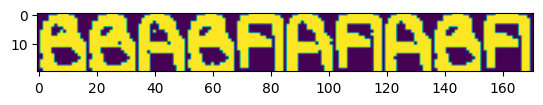

In [15]:
width, height = 20, 16
fichier = mio.loadmat("./binaryalphadigs")
data=RBM.lire_alpha_digits([10, 11, 12])


model = RBM(320,200) # RBM of size 320 = 20*16
model.init_RBM()
model.train_RBM(data)

RBM.generer_image_RBM(model, 1000, 10)


#RBM avec MNIST ou USPS

<ipython-input-13-749b1b304422>:15: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  fichier = mio.loadmat("./mnist_all")


  Rec_error : 37.214156  |  epoch 1/1000
  Rec_error : 17.221769  |  epoch 11/1000
  Rec_error : 12.129819  |  epoch 21/1000
  Rec_error : 9.251156  |  epoch 31/1000
  Rec_error : 7.389409  |  epoch 41/1000
  Rec_error : 6.092233  |  epoch 51/1000
  Rec_error : 5.110784  |  epoch 61/1000
  Rec_error : 4.465584  |  epoch 71/1000
  Rec_error : 3.908167  |  epoch 81/1000
  Rec_error : 3.403724  |  epoch 91/1000
  Rec_error : 3.066703  |  epoch 101/1000
  Rec_error : 2.702202  |  epoch 111/1000
  Rec_error : 2.458935  |  epoch 121/1000
  Rec_error : 2.179192  |  epoch 131/1000
  Rec_error : 2.006780  |  epoch 141/1000
  Rec_error : 1.828953  |  epoch 151/1000
  Rec_error : 1.695512  |  epoch 161/1000
  Rec_error : 1.562518  |  epoch 171/1000
  Rec_error : 1.424095  |  epoch 181/1000
  Rec_error : 1.302900  |  epoch 191/1000
  Rec_error : 1.218415  |  epoch 201/1000
  Rec_error : 1.139215  |  epoch 211/1000
  Rec_error : 1.066113  |  epoch 221/1000
  Rec_error : 0.981434  |  epoch 231/1000


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

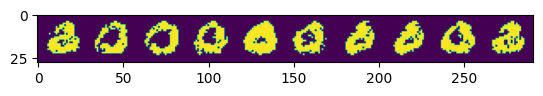

In [ ]:
# MNIST

def lire_mnist(caracteres):
    matrice, samples = [], []
    for caractere in caracteres:
        for example in fichier['train'+str(caractere)]:
            example = (example > 255/2)*1  # Binarization
            samples.append(example.reshape(28*28)) # Reshape
        samples = random.sample(samples, 250)
        matrice += samples
    return np.array(matrice)


width, height = 28, 28
fichier = mio.loadmat("./mnist_all")
data = lire_mnist([0,1,2])

model = RBM(784,200) # RBM of size 784 = 28*28
model.init_RBM()
model.train_RBM(data)

RBM.generer_image_RBM(model, 1000, 10)

<ipython-input-5-fe1b3239f375>:15: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  fichier = mio.loadmat("./usps_all")


  Rec_error : 21.438253  |  epoch 1/1000
  Rec_error : 8.084164  |  epoch 11/1000
  Rec_error : 4.626460  |  epoch 21/1000
  Rec_error : 3.005538  |  epoch 31/1000
  Rec_error : 2.010094  |  epoch 41/1000
  Rec_error : 1.412557  |  epoch 51/1000
  Rec_error : 1.033693  |  epoch 61/1000
  Rec_error : 0.771268  |  epoch 71/1000
  Rec_error : 0.578534  |  epoch 81/1000
  Rec_error : 0.455973  |  epoch 91/1000
  Rec_error : 0.366432  |  epoch 101/1000
  Rec_error : 0.289454  |  epoch 111/1000
  Rec_error : 0.234504  |  epoch 121/1000
  Rec_error : 0.197132  |  epoch 131/1000
  Rec_error : 0.165346  |  epoch 141/1000
  Rec_error : 0.135353  |  epoch 151/1000
  Rec_error : 0.115809  |  epoch 161/1000
  Rec_error : 0.099737  |  epoch 171/1000
  Rec_error : 0.086345  |  epoch 181/1000
  Rec_error : 0.075356  |  epoch 191/1000
  Rec_error : 0.065287  |  epoch 201/1000
  Rec_error : 0.060115  |  epoch 211/1000
  Rec_error : 0.054500  |  epoch 221/1000
  Rec_error : 0.047886  |  epoch 231/1000
  

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

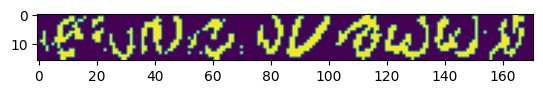

In [5]:
# USPS

def lire_usps(caractères):
    matrice, samples = [], []
    data = np.swapaxes(fichier['data'], 0, 2)
    for caractère in caractères:
        for example in data[caractère]:
            example = (example > 255/2)*1  # Binarization
            samples.append(example.reshape(16*16))  # Reshape
        samples = random.sample(samples, 250)
        matrice += samples
    return np.array(matrice)

width, height = 16, 16
fichier = mio.loadmat("./usps_all")
data = lire_usps([2,3,4,5,6])

model = RBM(256,300) # RBM of size 256 = 16*16
model.init_RBM()
model.train_RBM(data)

RBM.generer_image_RBM(model, 1000, 10)